Synchronization of metronomes
========

學號:106022556 張肇浲
--------

參考paper http://www.math.pitt.edu/~bard/classes/mth3380/syncpapers/metronome.pdf

嘗試模擬兩個節拍器的共振
理論上，我們經由單一個節拍器的運動方程式由動量守恆去將兩個節拍器的關係找出來。

得到最後方程式:

$\frac{d^{2}\theta_{i}}{dx^{2}}+(1+\Delta)sin\theta_{i}+\mu((\frac{\theta_{i}}{\theta_{o}})^2 -1)\frac{d\theta_{i}}{d\iota}-(\beta cos\theta_{i})\frac{d^{2}(sin\theta_{1}+\theta_{2})}{d\iota^{2}}$

我們用euler法解二階非線性微分方程。將參數定為如下(其參數主要來自參考資料，非隨便假設)。

初始條件:

這邊以a,b表示兩個節拍器

(1)$\Delta$=0.001 ($\Delta$代表著兩個節拍器角頻率差的大小)

(2)$\theta_{a}$=0.5$\pi$

(3)$\mu$=0.01 (耦合項次)

(4)$\theta_{0}$=0.5$\pi$=0.39

(5)$w_{a}$=0.0

(6)$w_{0}$=10.7

(7)$\beta$=0.1  (阻尼向次)

(8)$\theta_{b}$=-90*3.14/180

(9)$w_{b}$=0.0

10)h=0.01 (euler法)


我們先假設$\Delta$=0 兩個節拍器沒有頻率差,$\theta$一個是0.05$\pi$ 一個是負0.5$\pi$,正負只是代表節拍器的左右邊

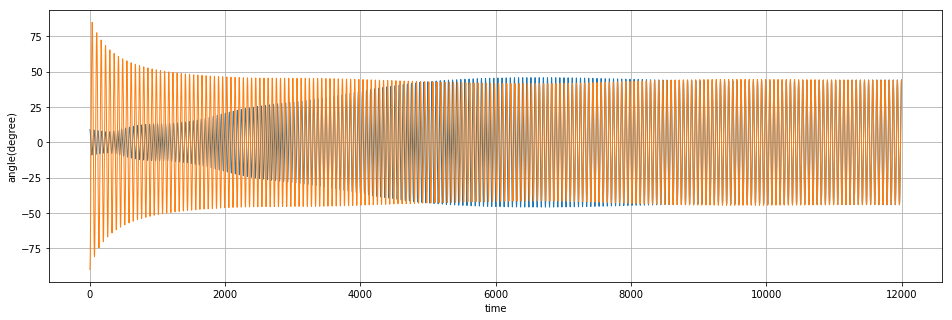

In [46]:
import math
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def run():
    delta = 0.000
    
    thetaa = 0.05*math.pi
    u= 0.01
    theta0 = 0.39
    wa = 0.0
    wo = 10.7
    b = 0.011
    thetab = -0.5*math.pi
    wb = 0.0
    h = 0.01

    time = 12000
    #time是運行時間和下面的y矩陣一樣
    y = []
    Amatri = []
    Bmatri = []
    for s in range(time):
        Amatri.append(0)
        Bmatri.append(0)
        y.append(0)


    for s in range(time):
        aa=(1+delta)*math.sin(thetaa)+u*(((thetaa/theta0)**2)-1)*(wa/wo)
        ab=(1-delta)*math.sin(thetab)+u*(((thetab/theta0)**2)-1)*(wb/wo)
        ca=b*math.cos(thetaa)*(1.0/(wo**2))
        cb=b*math.cos(thetab)*(1.0/(wo**2))

        da=(math.sin(thetaa)*wa**2+math.sin(thetab)*wb**2)
        db=(math.sin(thetaa)*wa**2+math.sin(thetab)*wb**2)


        Aaccelerate=(-aa-ca*da)*(wo**2)
        Baccelerate=(-ab-cb*db)*(wo**2)
        Amatri[s] = thetaa*180/3.14
        Bmatri[s] = thetab*180/3.14
        y[s] = s
        wa=wa+Aaccelerate*h
        wb=wb+Baccelerate*h

        thetaa=thetaa+wa*h
        thetab=thetab+wb*h


#    print(y)
#    fig = plt.figure()
    fig, ax = plt.subplots(figsize=(16,5))
    ax.plot(y,Amatri,lw=1)
    ax.plot(y,Bmatri,lw=1)
    ax.set(xlabel='time', ylabel='angle(degree)')
#    ax.plot(Amatri,Bmatri,y,'r')
    ax.grid()
run()
    

我們嘗試將角度差異變大,$\theta$一個是0.49$\pi$ 一個是負0.5$\pi$

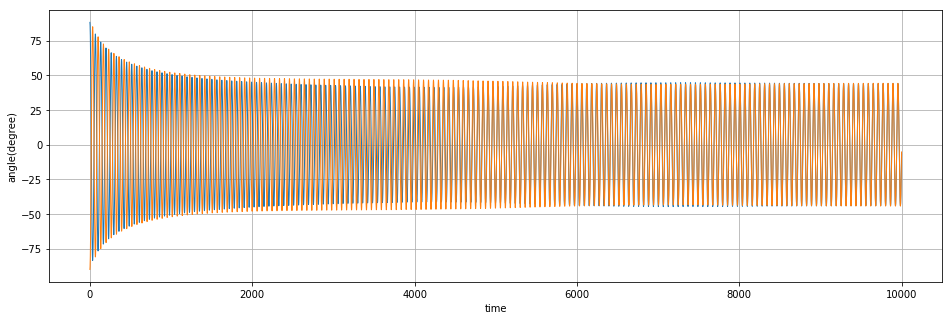

一樣可以同步的近乎完美

但有一個很奇怪的地方是當$\theta$一個是0.5$\pi$ 一個是負0.5$\pi$ 差$\pi$時

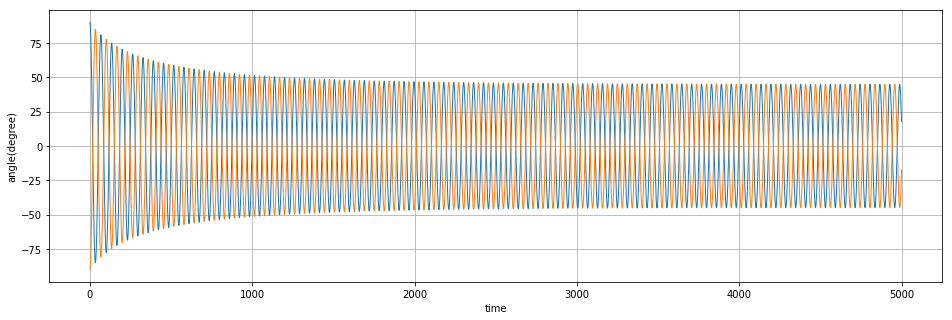

兩個節拍器會無法共振相位差永遠跟一開始一樣,所以推測一開始的相位差可能完全反向。

現在我們將$\Delta$設定成0.001

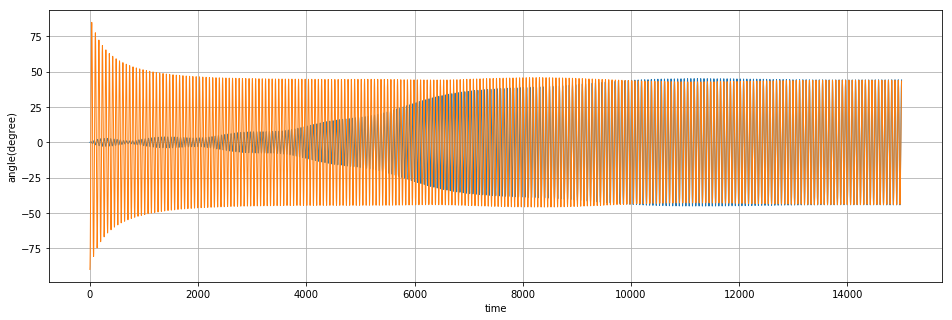

在第一種情況中,一樣會共振 但時間需要久一點。

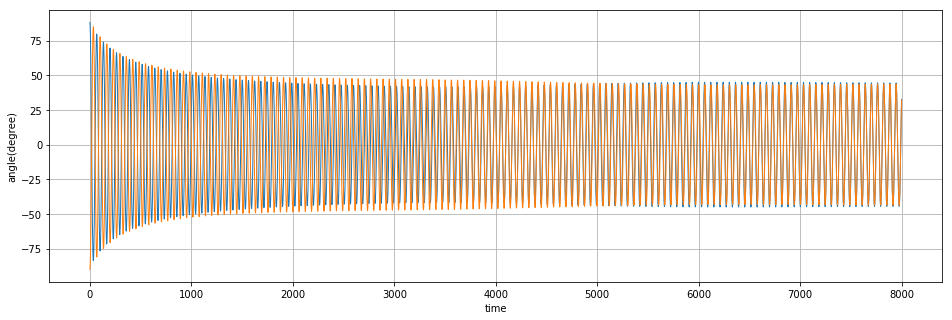

第二種情況(角度相差更大的時候，但並不完全反向)也會發生共振

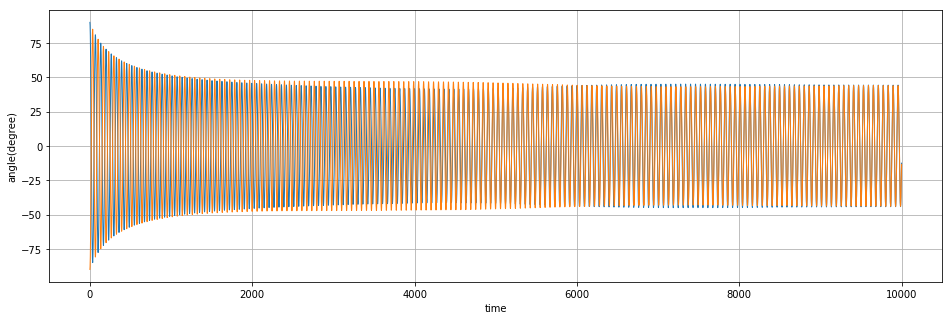

在第三種情況中，角度完全的反向，如果$\Delta$不是為0，那會發現節拍器會發生共振

其中會發現藍色線永遠高出橘色點一點點，推測是因為$\Delta$是兩個節拍器角頻率的差，現在把$\Delta$改為-0.001

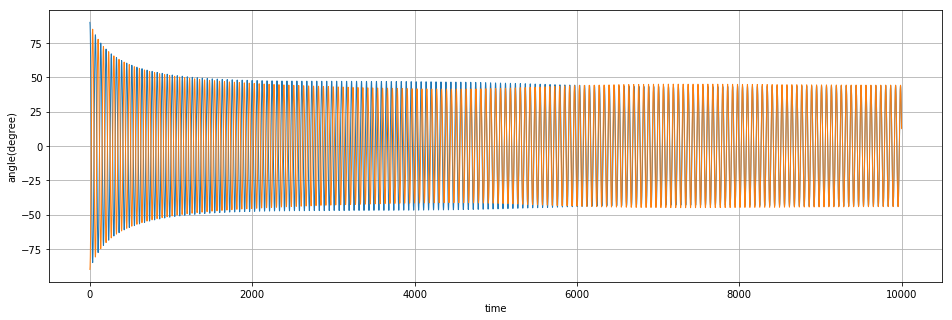

這樣橘色線會大於藍色線一點點，而節拍器也match在一起。
